In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
# initialising starting and ending point
start = "2010-01-01"
end = "2022-7-30"

# data frame = data to which we are refering
df = data.DataReader('AAPL','yahoo', start, end)

# data head calls starting point of data
df.head()
# data tail calls ending point of data
# df.tail() #{note: use it seperately}

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-25,155.039993,152.279999,154.009995,152.949997,53623900.0,152.737839
2022-07-26,153.089996,150.800003,152.259995,151.600006,55138700.0,151.389725
2022-07-27,157.330002,152.160004,152.580002,156.789993,78620700.0,156.572510
2022-07-28,157.639999,154.410004,156.979996,157.350006,81378700.0,157.131744
2022-07-29,163.630005,159.500000,161.240005,162.509995,101689200.0,162.284576


In [4]:
# changing/ adding the index since dates are not much useful
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [5]:
# droping 2 columns date, adj close
df= df.drop(['Date','Adj Close'], axis= 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


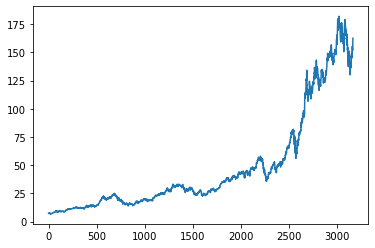

In [6]:
# closing price of apple stock display
plt.plot(df.Close)

In [7]:
# df shows the data representation of the table
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3161,155.039993,152.279999,154.009995,152.949997,53623900.0
3162,153.089996,150.800003,152.259995,151.600006,55138700.0
3163,157.330002,152.160004,152.580002,156.789993,78620700.0
3164,157.639999,154.410004,156.979996,157.350006,81378700.0


In [8]:
#A moving average is a statistic that captures 
#the average change in a data series over time
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3161    153.9333
3162    153.7837
3163    153.6893
3164    153.6311
3165    153.6632
Name: Close, Length: 3166, dtype: float64

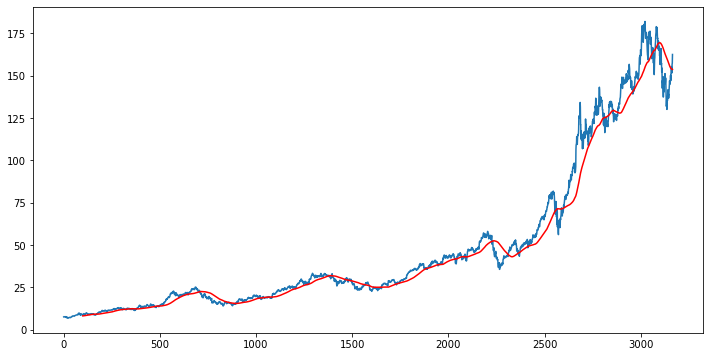

In [9]:
# representing moving average in closing price graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3161    158.65000
3162    158.69155
3163    158.76100
3164    158.83370
3165    158.93870
Name: Close, Length: 3166, dtype: float64

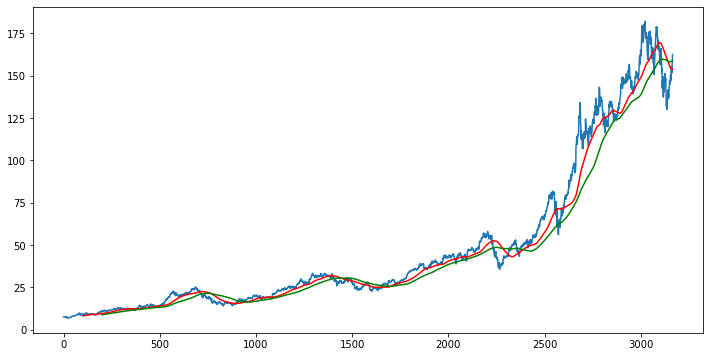

In [11]:
# representing moving average in closing price graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
# df.shape to understand the rows vs columns we have
df.shape

(3166, 5)

In [13]:
# splitting data into training and testing in 70 to 30 percent ratio

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2216, 1)
(950, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2216,54.827499
2217,55.162498
2218,55.682499
2219,53.772499
2220,54.950001


In [16]:
# scaling down the data to 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
# scalling the training data set
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.95152321],
       [0.94683196],
       [0.92156738]])

In [18]:
data_training_array.shape

(2216, 1)

In [19]:
# dividing data to x and y variable
# x depicting known values
# y depicting values to be predicted
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])
    
x_train                  

[array([[1.30406671e-02],
        [1.53304721e-02],
        [1.55887785e-02],
        [1.32082265e-02],
        [1.29359483e-02],
        [1.39133053e-02],
        [1.26078572e-02],
        [1.09393560e-02],
        [1.29848170e-02],
        [1.21331319e-02],
        [9.68974866e-03],
        [1.60495227e-02],
        [1.37387926e-02],
        [1.11836906e-02],
        [3.97921271e-03],
        [7.69315638e-03],
        [9.69672991e-03],
        [1.10510654e-02],
        [5.05429799e-03],
        [6.97193404e-06],
        [1.87092036e-03],
        [2.65978352e-03],
        [5.01241046e-03],
        [0.00000000e+00],
        [2.38053332e-03],
        [1.44507314e-03],
        [2.89016492e-03],
        [2.14317998e-03],
        [4.62146951e-03],
        [5.81524544e-03],
        [7.92353779e-03],
        [7.33014978e-03],
        [7.59541882e-03],
        [6.71579935e-03],
        [5.84316114e-03],
        [3.49751545e-03],
        [6.01072058e-03],
        [6.94618076e-03],
        [8.7

In [23]:
# converting x_train, y_traing to numpy arrays
# so that we can provide this data to LSTM
x_train, y_train =np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(2116, 100, 1)

## ML Model

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
# creating sequential model
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences =True, 
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation ='relu', return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation ='relu', return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))



model.add(Dense(units =1))

In [27]:
# showcasing the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [29]:
# compiling our model
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
67/67 [==============================] - 36s 320ms/step - loss: 0.0319
Epoch 2/50
67/67 [==============================] - 22s 332ms/step - loss: 0.0065
Epoch 3/50
67/67 [==============================] - 22s 331ms/step - loss: 0.0065
Epoch 4/50
67/67 [==============================] - 25s 377ms/step - loss: 0.0055
Epoch 5/50
67/67 [==============================] - 27s 395ms/step - loss: 0.0050
Epoch 6/50
67/67 [==============================] - 26s 386ms/step - loss: 0.0047
Epoch 7/50
67/67 [==============================] - 24s 363ms/step - loss: 0.0048
Epoch 8/50
67/67 [==============================] - 23s 337ms/step - loss: 0.0042
Epoch 9/50
67/67 [==============================] - 22s 326ms/step - loss: 0.0039
Epoch 10/50
67/67 [==============================] - 20s 299ms/step - loss: 0.0041
Epoch 11/50
67/67 [==============================] - 20s 292ms/step - loss: 0.0035
Epoch 12/50
67/67 [==============================] - 20s 303ms/step - loss: 0.0035
Epoch 13/50
6

In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

,Close
2216,54.827499
2217,55.162498
2218,55.682499
2219,53.772499
2220,54.950001


In [32]:
# to predict the values of testing data we need previous 100 days
past_100_days = data_training.tail(100)

In [35]:
# appending past 100 dataset to the data testing
final_df =past_100_days.append(data_testing, ignore_index=True)

C:\Users\scs12\AppData\Local\Temp\ipykernel_13452\321009542.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df =past_100_days.append(data_testing, ignore_index=True)


In [36]:
final_df.head()

,Close
0,46.875000
1,46.717499
2,47.560001
3,47.957500
4,48.327499


In [38]:
# now scalling down the data
input_data= scaler.fit_transform(final_df)
input_data

array([[0.07734062],
       [0.07626525],
       [0.08201759],
       ...,
       [0.82780574],
       [0.83162933],
       [0.86686011]])

In [39]:
input_data.shape

(1050, 1)

In [40]:
x_test=[]
y_test=[]

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [41]:
# converting them to numpy array
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(950, 100, 1)
(950,)


In [42]:
# Making Predictions

y_predicted= model.predict(x_test)

30/30 [==============================] - 3s 77ms/step


In [43]:
y_predicted.shape

(950, 1)

In [44]:
y_test

array([0.13163779, 0.13392506, 0.13747546, 0.12443458, 0.13247419,
       0.12649996, 0.11956987, 0.1213792 , 0.13086968, 0.13660494,
       0.1114449 , 0.10139113, 0.10511224, 0.115661  , 0.11316891,
       0.10630708, 0.08872578, 0.08541435, 0.07614578, 0.08401469,
       0.08763335, 0.07454126, 0.05938379, 0.05904241, 0.05137833,
       0.05535546, 0.05470684, 0.06614321, 0.06377059, 0.06211488,
       0.07276608, 0.0588888 , 0.05552616, 0.04489204, 0.04678673,
       0.04513101, 0.04593327, 0.04909106, 0.03975419, 0.03712555,
       0.0407613 , 0.03191943, 0.02498933, 0.0145771 , 0.00792012,
       0.02556968, 0.02382861, 0.02396517, 0.02654264, 0.02684987,
       0.        , 0.010361  , 0.00979771, 0.01461125, 0.01898096,
       0.01981736, 0.01723989, 0.01333105, 0.01857132, 0.02176325,
       0.02333362, 0.02497227, 0.0189639 , 0.02002218, 0.01793974,
       0.02657676, 0.02408467, 0.02131943, 0.03936161, 0.04139285,
       0.04152941, 0.04960314, 0.05460441, 0.05470684, 0.04907

In [45]:
y_predicted

array([[0.20054993],
       [0.20020738],
       [0.1997859 ],
       [0.19932683],
       [0.19883797],
       [0.19833581],
       [0.19782346],
       [0.1972872 ],
       [0.19671641],
       [0.1961273 ],
       [0.19555995],
       [0.19499621],
       [0.19439076],
       [0.19370282],
       [0.19292508],
       [0.19206452],
       [0.19112502],
       [0.19008526],
       [0.1889216 ],
       [0.18760668],
       [0.18613976],
       [0.18454424],
       [0.18283463],
       [0.18100579],
       [0.17905766],
       [0.17698629],
       [0.17480683],
       [0.17254399],
       [0.17025787],
       [0.16797008],
       [0.16572714],
       [0.1635997 ],
       [0.16161174],
       [0.1597617 ],
       [0.15802333],
       [0.15637287],
       [0.15479212],
       [0.15327138],
       [0.15181383],
       [0.15041134],
       [0.14904961],
       [0.14772855],
       [0.14643836],
       [0.1451586 ],
       [0.14385861],
       [0.14250712],
       [0.14112034],
       [0.139

In [46]:
# scalling the valuesback again
# finding the factor
scaler.scale_

array([0.00682769])

In [47]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

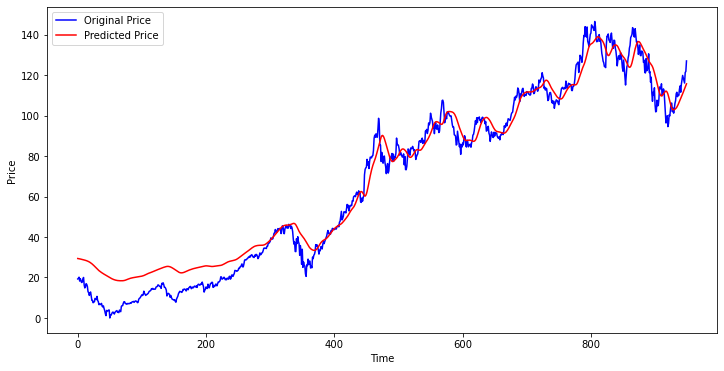

In [49]:
# ploting the predicted vs original values
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()